In [2]:
#nltk.download()

# Notebook para extrair features de menções
## Nome: 

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [57]:
import numpy as np
from pylab import *
import csv
from wordcloud import WordCloud, STOPWORDS


#import utils

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import json


import json
import csv
import gc
from pandas import read_csv






In [58]:
#calcular flesch_reading e ambiguidade

from textstat.textstat import textstat

import nltk
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize
import string
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords

#nltk.download()


pd.set_option('display.max_colwidth', -1)
#textD=reviewFileDF['text'][:1].astype(str)


class text_object(object):

    def __init__(self):
        self.word_count = 0
        self.sentence_count = 0
        self.syllable_count = 0
        self.number_diff_words = 0 #to be calculated
        self.avg_syllables_per_word = 0
        self.avg_sentence_length = 0
        #should frequency and top words be included?
        
    def print_metrics(self):
        print "word count ="
        print self.word_count
    
        print "sentence count ="
        print self.sentence_count
    
        print "syllable count ="
        print self.syllable_count
    
        print "avg syllable per word ="
        print self.avg_syllables_per_word
    
        print "avg sentence length ="
        print self.avg_sentence_length

        
def calc_basic_metrics (stat):

    #numberDiffWords #to be calculated
    textObj = text_object()
        
    textObj.sentence_count = sentence_count(stat)
    textObj.word_count = word_count(stat)
    textObj.syllable_count = syllable_count(stat)    
    textObj.avg_syllables_per_word = avg_syllables_per_word(stat)
    textObj.avg_sentence_length = avg_sentence_length(stat)
    
    #dfTwitter.write_csv("/sdf/asdf/asd")
    
    return textObj
        
def preprocess_text(texto):
    tokens = nltk.word_tokenize(texto.decode('utf-8'))
    #check lenght words
    words = [w.lower() for w in tokens if len(w)<20]
    #print(words)   

    #print(texto)   
    #texto = nltk.Text(words)
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in words]).strip()  

def avg_sentence_length (texto):
    x=0
    try:
        x= textstat.avg_sentence_length(texto)
    except:
        x=0
    return x

def avg_syllables_per_word (texto):
    x=0
    try:
        x= textstat.avg_syllables_per_word(texto)
    except:
        x=0
    return x

def word_count (texto):
    x=0
    try:
        x= textstat.lexicon_count(texto)
    except:
        x=0
    return x

def sentence_count (texto):
    x=0
    try:
        x= textstat.sentence_count(texto)
    except:
        x=0
    return x

def syllable_count (texto):
    x=0
    try:
        x= textstat.syllable_count(texto)
    except:
        x=0
    return x

def calc_flesch_reading_ease( text):

    #text = preprocess_text(text)
    x=0
    try:
        ASL = textstat.avg_sentence_length(text)
        ASW = textstat.avg_syllables_per_word(text)

        FRE = 206.835 - float(1.015 * ASL) - float(84.6 * ASW)
        return round(FRE, 2)
    except:
        return 0

def calc_coleman_liau_index (texto):
    x=0
    try:
        x= textstat.coleman_liau_index(texto)
    except:
        x=0
    return x
            
def calc_flesch_kincaid_grade (texto):
    x=0
    try:
        ASL = textstat.avg_sentence_length(texto)
        ASW = textstat.avg_syllables_per_word(texto)
        FKRA = float(0.39 * ASL) + float(11.8 * ASW) - 15.59
        x= round(FKRA, 1)
    except:
        x=0
    return x



def calcAmbiguidadte(sentence):
    tokens = nltk.word_tokenize(sentence)

    #check lenght words
    tokens = [w.lower() for w in tokens if len(w)<20]
    
    #stopwordremoval
    #stop = stopwords.words('english')
    #tokens = [w.lower() for w in tokens if w not in stop]
    
    postag= nltk.pos_tag(tokens)


    nVerb=0
    nNoun=0
    nAdjective=0
    nAdverb=0

    mVerb=0
    mNoun=0
    mAdjective=0
    mAdverb=0

    avgMVerb = 0
    avgMNoun = 0
    avgMAdjective = 0
    avgMAdverb = 0

    AvgAmbiquity = 0


    #Tag Meaning
    #https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

    for tag in postag:
        word = tag[0]
        word_clas = tag[1]
        #print(word_clas)
        if word_clas == "VB" or word_clas == "VBD" or word_clas == "VBG" or word_clas == "VBN" or word_clas == "VBP" or word_clas == "VBZ" :
            nVerb +=1
            mVerb += len(wn.synsets(word))
        elif word_clas == "NN" or word_clas == "NNS" or word_clas == "NNP" or word_clas == "NNPS" :
            nNoun +=1
            mNoun += len(wn.synsets(word))
        elif word_clas == "JJ" or word_clas == "JJR" or word_clas == "JJS" :
            nAdjective +=1
            mAdjective += len(wn.synsets(word))
        elif word_clas == "RB" or word_clas == "RBR" or word_clas == "RBS":
            nAdverb +=1
            mAdverb += len(wn.synsets(word))


    if nVerb > 0: avgMVerb =  mVerb / float(nVerb)
    if nNoun > 0: avgMNoun = mNoun / float(nNoun)
    if nAdjective > 0: avgMAdjective = mAdjective / float(nAdjective)
    if nAdverb > 0: avgMAdverb = mAdverb / float(nAdverb)

    if (nVerb+nNoun+nAdjective+nAdverb) > 0: AvgAmbiquity = (mVerb+mNoun+mAdjective+mAdverb) / float(nVerb+nNoun+nAdjective+nAdverb)
    return AvgAmbiquity




In [54]:
print "Text Ambiguity level:"
#calcAmbiguidadte("The original Latin word universitas refers in general to a number of persons associated into one body, a society, company, community, guild, corporation, etc. At the time of the emergence of urban town life and medieval guilds, specialised associations of students and teachers with collective legal rights usually guaranteed by charters issued by princes, prelates, or the towns in which they were located came to be denominated by this general term. Like other guilds, they were self-regulating and determined the qualifications of their members.")
calcAmbiguidadte("Life hack: drink 13 Pumpkin Spice Lattes in a row, and your bathroom will smell just like fall! Got caught smoking a hookah. Damn Armenian paparazzi! #ConanArmenia http://t.co/ochCoX700D Celebrating my assistant Sona's birthday in her homeland of Armenia. http://t.co/ofwfFWdQC5 #ConanArmenia Brought my assistant Sona home to Armenia. It was this or give her a raise. #ConanArmenia airs 11/10. http://t.co/m4beg84uHV")

Text Ambiguity level:


8.585365853658537

In [95]:
dfSuya = pd.read_csv("suyapc_tweets.csv", encoding='utf-8')
dfConan = pd.read_csv("ConanObrien_tweets.csv", encoding='utf-8')
dfGod = pd.read_csv("TheTweetOfGod_tweets.csv", encoding='utf-8')

dfHillary = pd.read_csv("HillaryClinton_tweets.csv", encoding='utf-8')
dfTrump = pd.read_csv("realdonaldtrump_tweets.csv", encoding='utf-8')


"""for index, row in dataset.iterrows():
    stat= row['text']
    calc_basic_metrics(stat)
"""

def dfMetrics (dataframe):
    dataframe['word_count'] = dataframe['text'].map(lambda x: calc_basic_metrics(x).word_count )
    dataframe['sentence_count'] = dataframe['text'].map(lambda x: calc_basic_metrics(x).sentence_count )
    dataframe['syllable_count'] = dataframe['text'].map(lambda x: calc_basic_metrics(x).syllable_count )
    dataframe['avg_syllables_per_word'] = dataframe['text'].map(lambda x: calc_basic_metrics(x).avg_syllables_per_word )
    dataframe['avg_sentence_length'] = dataframe['text'].map(lambda x: calc_basic_metrics(x).avg_sentence_length )



In [25]:
dfMetrics(dfConan)


In [28]:
dfMetrics(dfGod)


In [72]:
dfMetrics(dfHillary)


In [96]:
dfMetrics(dfTrump)

In [73]:
dfHillary.head()

,id,created_at,text,word_count,sentence_count,syllable_count,avg_syllables_per_word,avg_sentence_length
0,659704467344875520,2015-10-29 12:12:56,"""Do you think that when you’re president, you’ll be paid as much as a man?""\nhttps://t.co/2uQMq2v5ev",16,1,19,1.2,16
1,659556301127725056,2015-10-29 02:24:10,Tonight's #GOPDebate made it clear: We cannot afford a Republican in the White House. Get your free sticker: https://t.co/o662Sz9ACJ,19,2,31,1.6,9
2,659555444202070016,2015-10-29 02:20:46,#GOPdebate https://t.co/rBT90JvCmM,2,0,5,2.5,0
3,659553987105042432,2015-10-29 02:14:59,Will repeat this as often as needed: Women—not the politicians on stage—should make decisions about their own health. #GOPdebate,19,1,32,1.7,19
4,659550706307698688,2015-10-29 02:01:56,Republicans are looking out for the wealthy and well-connected. Hillary is looking out for us. #GOPdebate\nhttps://t.co/zTkCxPCBFw,17,2,29,1.7,8


In [97]:
dfTrump.head()

,id,created_at,text,word_count,sentence_count,syllable_count,avg_syllables_per_word,avg_sentence_length
0,659762106602905600,2015-10-29 16:01:58,"""@ZankMatt: Another WIN! @realDonaldTrump https://t.co/yvW3WFA1mP""",5,0,12,2.4,0
1,659761323526389760,2015-10-29 15:58:51,"""@victoryorbust: The One, The Only, Donald Trump, will and can Make America Great Again ! @Reince @blewthebigone https://t.co/5kAtLBBFJA""",17,1,32,1.9,17
2,659761187328929792,2015-10-29 15:58:19,"""@Kotcha301: @realDonaldTrump I sleep better at night knowing u will soon be POTUS! https://t.co/5gIjiPufMx"" Thank you.",16,1,23,1.4,16
3,659761038946992128,2015-10-29 15:57:44,"""@neraex: I'm not even american and I want to see @realDonaldTrump win! A person like him is going to set a new standard for world leaders!""",26,2,34,1.3,13
4,659760878582022144,2015-10-29 15:57:05,"""@xXFlameriumXx: @MikeandDawnNY Good job Mr. Trump. The way you respond shows that you truly are ready to be the next US president! #Trump""",23,2,30,1.3,11


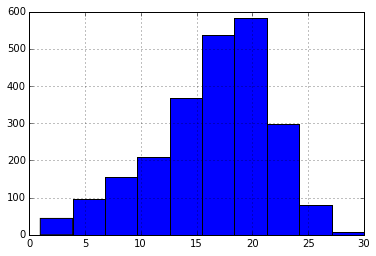

In [74]:
dfHillary['word_count'].hist()

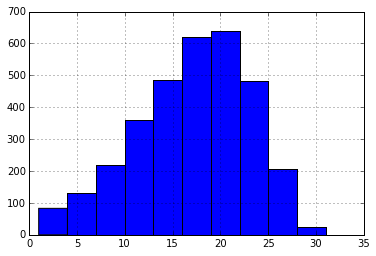

In [98]:
dfTrump['word_count'].hist()

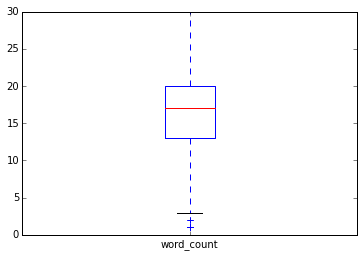

In [75]:
dfHillary['word_count'].plot(kind='box')

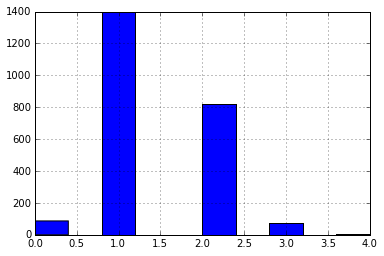

In [76]:
dfHillary['sentence_count'].hist()

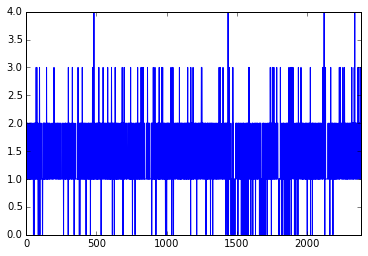

In [77]:
dfHillary['sentence_count'].plot()

(-0.5, 399.5, 199.5, -0.5)

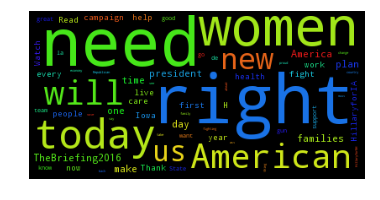

In [88]:
textTotal = ""
for index, row in dfHillary.iterrows():
    stat = row['text']
    textTotal = textTotal + stat
    
stopwords = STOPWORDS.copy()
stopwords.add("t")
stopwords.add("co")
stopwords.add("rt")
stopwords.add("y")
stopwords.add("m")
stopwords.add("s")
stopwords.add("amp")
stopwords.add("https")

stopwords.add("hillary")
stopwords.add("hillary's")
stopwords.add("hillaryclinton")
stopwords.add("hillary2016")



wordcloud = WordCloud(stopwords=stopwords,margin=10,max_font_size=80).generate(textTotal)
plt.imshow(wordcloud)
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

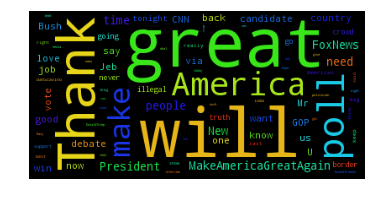

In [100]:
textTotal = ""
for index, row in dfTrump.iterrows():
    stat = row['text']
    textTotal = textTotal + stat
    
stopwords = STOPWORDS.copy()
stopwords.add("t")
stopwords.add("co")
stopwords.add("rt")
stopwords.add("y")
stopwords.add("m")
stopwords.add("s")
stopwords.add("amp")
stopwords.add("https")

stopwords.add("donald")
stopwords.add("realdonaldtrump")
stopwords.add("trump")
stopwords.add("trump2016")



wordcloud = WordCloud(stopwords=stopwords,margin=10,max_font_size=80).generate(textTotal)
plt.imshow(wordcloud)
plt.axis("off")

In [101]:
dfTrump.text

0       "@ZankMatt: Another WIN! @realDonaldTrump https://t.co/yvW3WFA1mP"                                                                                  
1       "@victoryorbust: The One, The Only, Donald Trump, will and can Make America Great Again !  @Reince @blewthebigone https://t.co/5kAtLBBFJA"          
2       "@Kotcha301: @realDonaldTrump I sleep better at night knowing u will soon be POTUS! https://t.co/5gIjiPufMx" Thank you.                             
3       "@neraex: I'm not even american and I want to see @realDonaldTrump win! A person like him is going to set a new standard for world leaders!"        
4       "@xXFlameriumXx:  @MikeandDawnNY Good job Mr. Trump. The way you respond shows that you truly are ready to be the next US president! #Trump"        
5       "@skillethead58: @realDonaldTrump hell of a job"                                                                                                    
6       "@derekcarlson: People need to wake up Mr. Trump. 